## RANDOM FOREST CLASSIFIER

## IMPORTING THE MAJOR LIBRARIES

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv(r"C:\module 7\car_evaluation (1).csv", header = None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## EDA

In [36]:
df.shape

(1728, 7)

In [38]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [40]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [44]:
for col in df.columns:
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [116]:
df['doors'].unique()

array(['2', '3', '4', '5more'], dtype=object)

In [118]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [120]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## DECLARING FEATURE AND TARGET VARIABLES

In [123]:
x = df.drop(['class'], axis = 1)
y = df['class']

In [125]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [127]:
x_train.shape

(1157, 6)

In [129]:
x_test.shape

(571, 6)

In [131]:
y_train.shape

(1157,)

In [133]:
y_test.shape

(571,)

## FEATURE ENGINEERING|

In [136]:
x_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [138]:
x_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## ENCODING CATEGORICAL ENCODERS

In [141]:
import category_encoders as ce

In [143]:
encoder = ce.OrdinalEncoder( cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [145]:
x_test

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1
...,...,...,...,...,...,...
1034,4,2,4,3,3,2
341,1,3,3,2,3,2
147,1,2,1,2,1,1
360,1,3,1,2,2,1


## RANDOM FOREST CLASSIFICATION WITH DEFAULT PARAMETERS

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rfc = RandomForestClassifier()

In [152]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [154]:
y_pred = rfc.predict(x_test)
y_pred

array(['unacc', 'good', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'good', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'good',
       'vgood', 'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc',
       'unacc', 'acc', 'good', 'acc', 'unacc', 'acc', 'vgood', 'acc',
       'unacc', 'good', 'unacc', 'unacc', 'unacc', 'good', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'good', 'good'

In [196]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [158]:
accuracy_score(y_test, y_pred)

0.9369527145359019

## RANDOM FOREST CLASSIFIER WITH PARAMETERS n_estimators = 100

In [163]:
rfc100 = RandomForestClassifier(n_estimators = 100, random_state = 0)
rfc100.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [165]:
ypred100 = rfc100.predict(x_test)

In [167]:
accuracy_score(y_test, ypred100)

0.9457092819614711

## FIND IMPORTANT FEATURES WITH RANDOMFORESTCLASSIFIER

In [170]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)

clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [172]:
feature_scores = pd.Series(clf.feature_importances_, index = x_train.columns).sort_values(ascending = False)
feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

## VISUALIZING FEATURE SCORES

C:\Users\aride\AppData\Local\Temp\ipykernel_13900\3954839584.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = feature_scores, y = feature_scores.index, palette = 'deep')


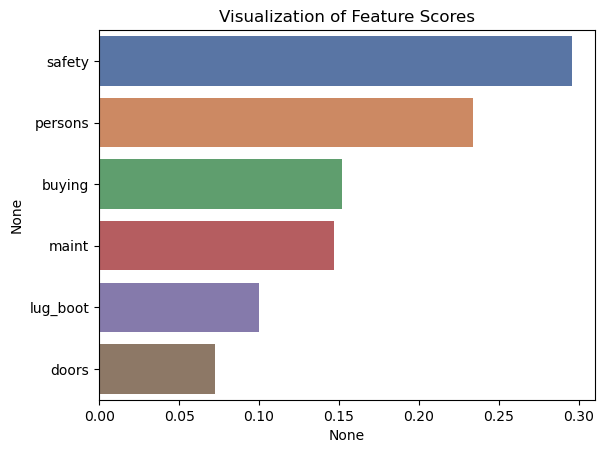

In [183]:
sns.barplot(x = feature_scores, y = feature_scores.index, palette = 'deep')
plt.title('Visualization of Feature Scores')
plt.show()

## BUILDING RFC ON SELECTED FEATURES

In [188]:
x = df.drop(['class', 'doors'], axis = 1)
y = df['class']

In [190]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [192]:
encoder = ce.OrdinalEncoder( cols = ['buying', 'maint', 'persons', 'lug_boot', 'safety'])

x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [194]:
clf = RandomForestClassifier(random_state = 2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.9264448336252189

In [212]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



In [216]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


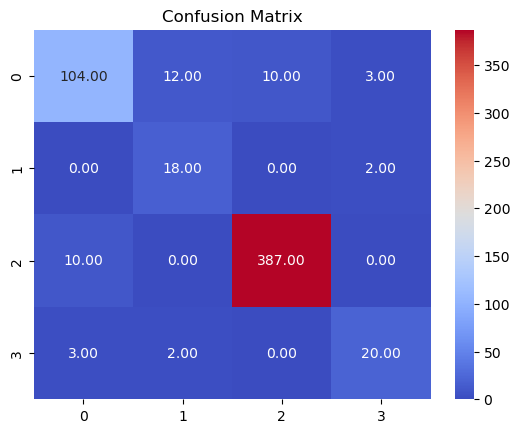

In [218]:
sns.heatmap(cm, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title('Confusion Matrix')
plt.show()